(10, 300) (300, 2)


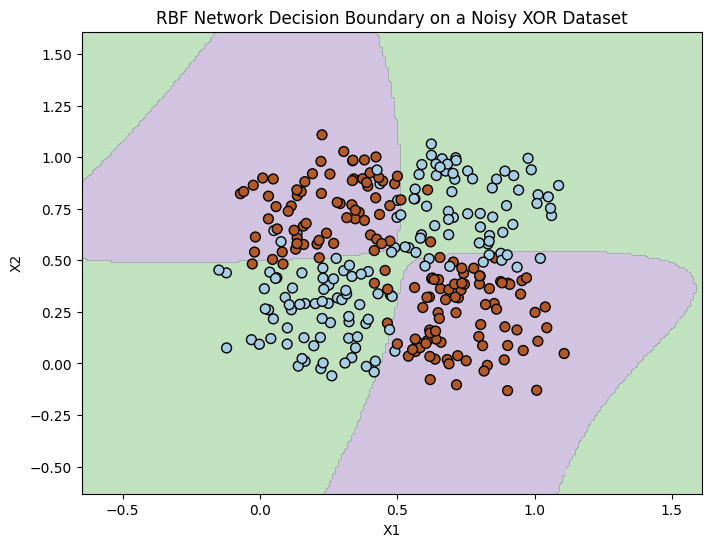

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # Using sklearn's KMeans for clustering

# -------------------------------
# Gaussian RBF Function
# -------------------------------
def gaussian_rbf(x, center, sigma):
    return np.exp(-np.linalg.norm(x - center)**2 / (2 * sigma**2))

# -------------------------------
# RBF Network Class
# -------------------------------
class RBFNetwork:
    def __init__(self, num_centers, sigma=None):
        self.num_centers = num_centers
        self.centers = None
        self.sigma = sigma
        self.weights = None

    def _compute_design_matrix(self, X):
        n_samples = X.shape[0]
        H = np.zeros((n_samples, self.num_centers))
        for i in range(n_samples):
            for j in range(self.num_centers):
                H[i, j] = gaussian_rbf(X[i], self.centers[j], self.sigma)
        return H

    def fit(self, X, y):
        self.centers = KMeans(n_clusters=self.num_centers, random_state=42).fit(X).cluster_centers_

        if self.sigma is None:
            dists = []
            for i in range(self.num_centers):
                for j in range(i + 1, self.num_centers):
                    dists.append(np.linalg.norm(self.centers[i] - self.centers[j]))
            self.sigma = np.mean(dists)

        H = self._compute_design_matrix(X)

        classes = np.unique(y)
        self.classes_ = classes
        T = np.zeros((y.shape[0], len(classes)))
        for i, label in enumerate(y):
            T[i, np.where(classes == label)[0][0]] = 1

        H_pinv = np.linalg.pinv(H)
        self.weights = H_pinv.dot(T)

    def predict(self, X):
        H = self._compute_design_matrix(X)
        outputs = H.dot(self.weights)
        preds = np.argmax(outputs, axis=1)
        return self.classes_[preds]

# -------------------------------
# XOR Data Generation with Noise
# -------------------------------
def generate_noisy_xor(n_samples=200, noise=0.1):
    X = np.random.rand(n_samples, 2)
    y = np.array([0 if (x[0] < 0.5 and x[1] < 0.5) or (x[0] >= 0.5 and x[1] >= 0.5) else 1
                  for x in X])
    X += noise * np.random.randn(n_samples, 2)
    return X, y

X_toy, y_toy = generate_noisy_xor(n_samples=300, noise=0.08)

# -------------------------------
# Train the RBF Network
# -------------------------------
num_centers = 10
rbf_net = RBFNetwork(num_centers=num_centers)
rbf_net.fit(X_toy, y_toy)

# -------------------------------
# Visualization
# -------------------------------
x_min, x_max = X_toy[:, 0].min() - 0.5, X_toy[:, 0].max() + 0.5
y_min, y_max = X_toy[:, 1].min() - 0.5, X_toy[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = rbf_net.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(0, 1, 3), cmap=plt.cm.Paired)
plt.scatter(X_toy[:, 0], X_toy[:, 1], c=y_toy, s=50, cmap=plt.cm.Paired, edgecolors='k')
plt.title("RBF Network Decision Boundary on a Noisy XOR Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [17]:
np.linalg.pinv(np.zeros((300, 10))).shape

(10, 300)